<a href="https://colab.research.google.com/github/faisal-khrisan/COVID-19-Outcome-Prediction/blob/main/COVID-19%20Outcome%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problem Statement and Dataset Description

### Problem Statement

This project aims to develop machine learning models that can accurately predict the presence of COVID-19 infection based on a range of symptoms. Early and reliable detection can help healthcare professionals make timely decisions, improving patient outcomes.

### Dataset Description

The dataset contains clinical symptom data collected in May 2020 following WHO guidelines. It has **5434 samples** with **20 features** representing symptoms such as Breathing Problem, Fever, Dry Cough, Sore throat, Running Nose, Asthma, Chronic Lung Disease, Headache, Heart Disease, Diabetes, etc.

The target variable is `COVID-19` (binary: true for positive, false for negative).

The dataset is imbalanced with approximately:
- 81% positive COVID cases (3620 samples)
- 19% negative COVID cases (1814 samples)

### Data Source and Usage

This dataset is provided for modeling and research purposes only and is not intended for direct clinical diagnosis or medical decision-making.

---

**Feature Distribution Example:**

| Symptom               | True (%) | False (%) |
|-----------------------|----------|-----------|
| Breathing Problem     | 67%      | 33%       |
| Fever                 | 79%      | 21%       |
| Dry Cough             | 80%      | 20%       |
| Sore throat           | 73%      | 27%       |
| ...                   | ...      | ...       |




# Load the Dataset

In [ ]:
import kagglehub

# Download latest version

path = kagglehub.dataset_download("hemanthhari/symptoms-and-covid-presence")

# Use the printed output path to read file
print("Path to dataset files:", path)

100%|██████████| 25.8k/25.8k [00:00<00:00, 14.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hemanthhari/symptoms-and-covid-presence/versions/1


# Import Statement

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------------------------- **Explority Data Anaylsis**-----------------------------------------


## 2. Data Preprocessing

The following steps will be  undertaken to prepare the data for modeling:




In [ ]:
df = pd.read_csv(f"{path}/Covid Dataset.csv")

df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

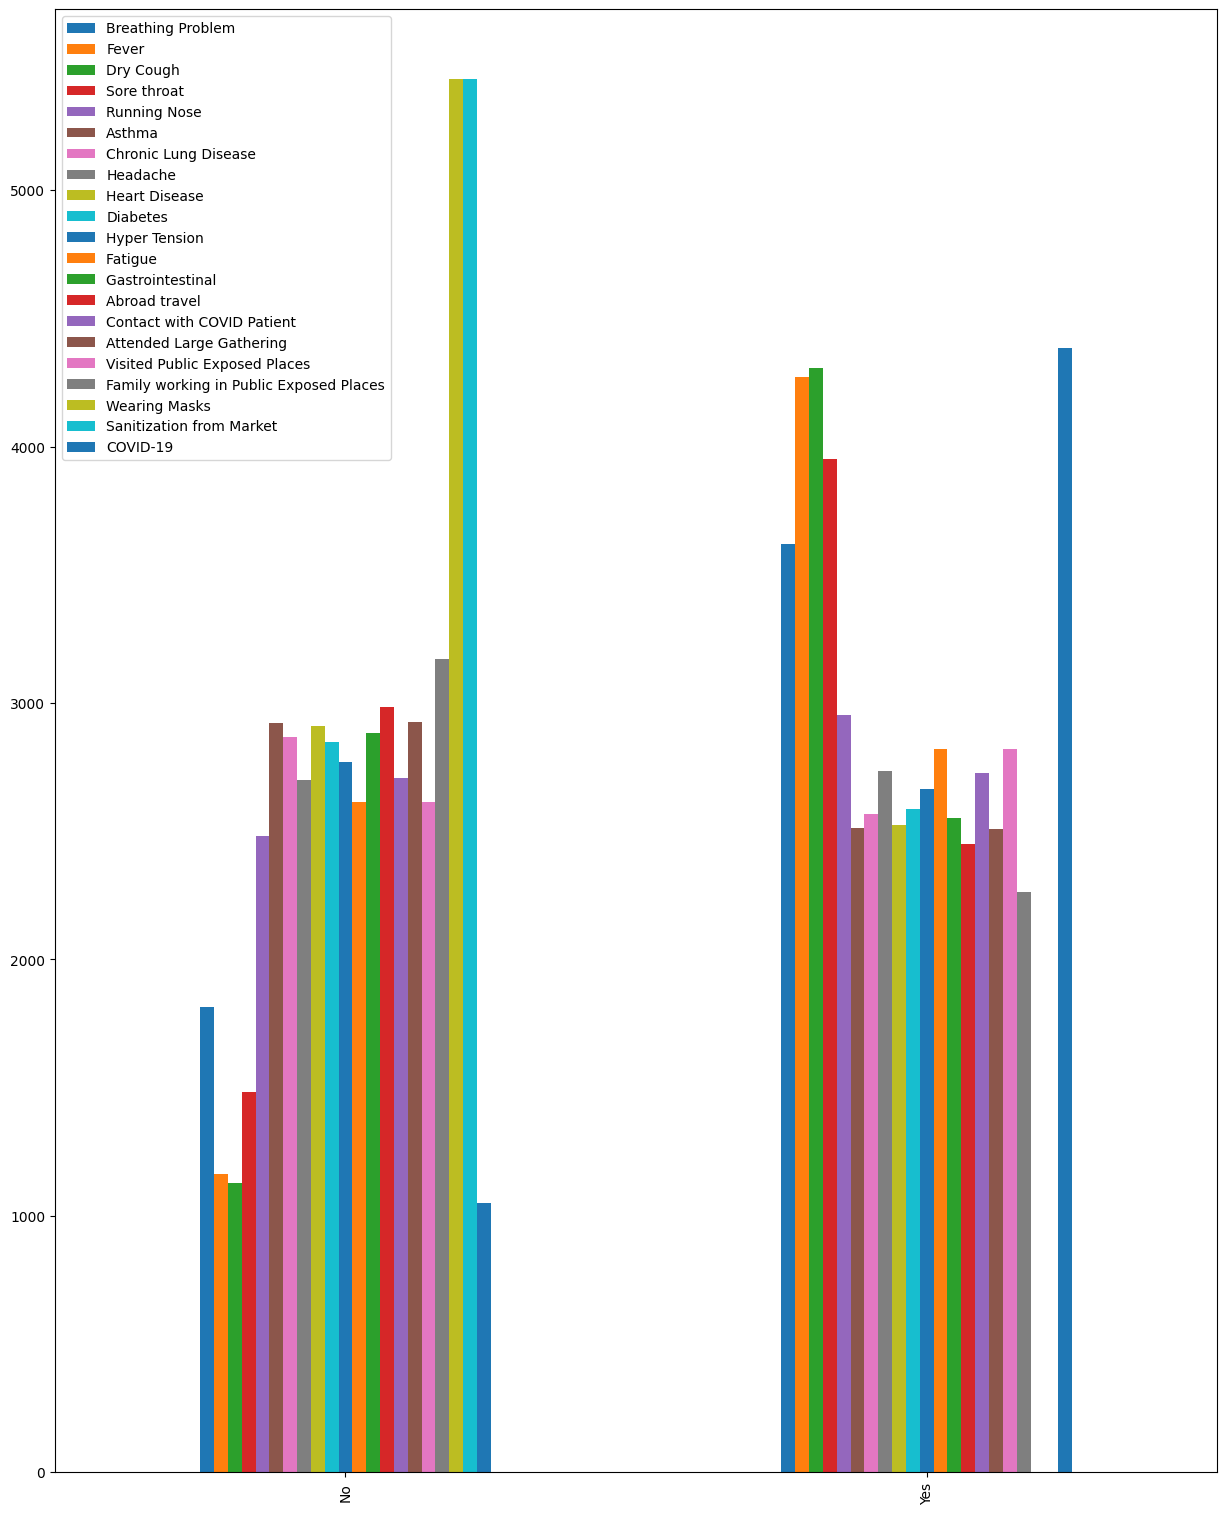

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df.apply(pd.Series.value_counts).plot(kind='bar', subplots=False, layout=(7, 3), figsize=(15, 19), legend=True, sharex=False, sharey=False)
plt.show()

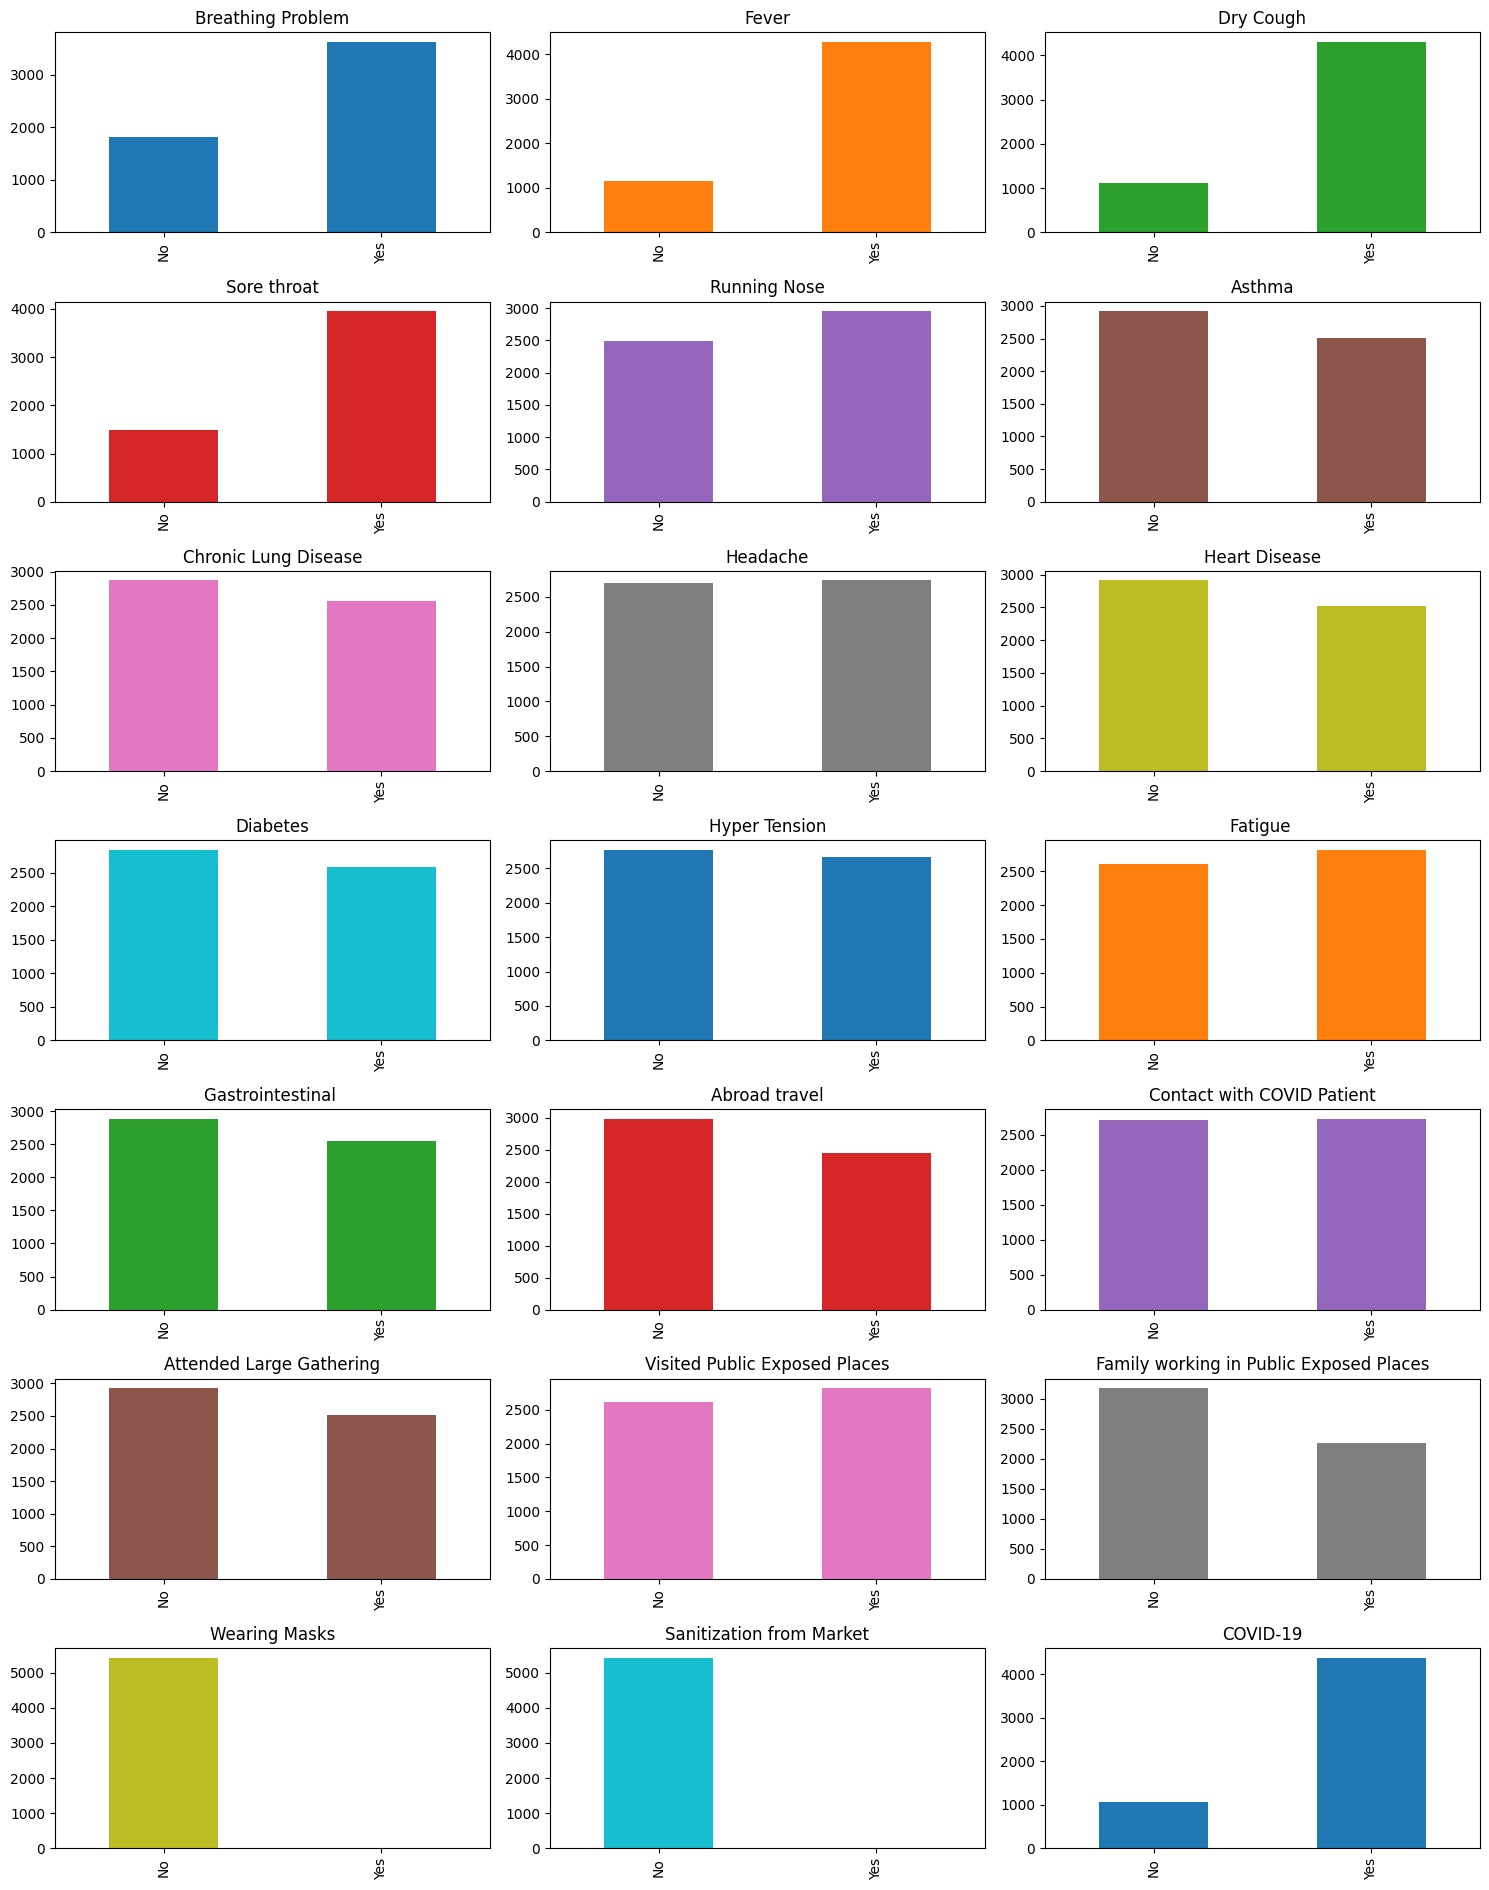

In [ ]:
df.apply(pd.Series.value_counts).plot(kind='bar', subplots=True, layout=(7, 3), figsize=(15, 19), legend=False, sharex=False, sharey=False)

plt.tight_layout()  #for the layout doesn't overlap
plt.show()

In [ ]:
features  = df.columns.to_list()
features.remove("COVID-19")
print(features)

['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat', 'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache', 'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ', 'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering', 'Visited Public Exposed Places', 'Family working in Public Exposed Places', 'Wearing Masks', 'Sanitization from Market']


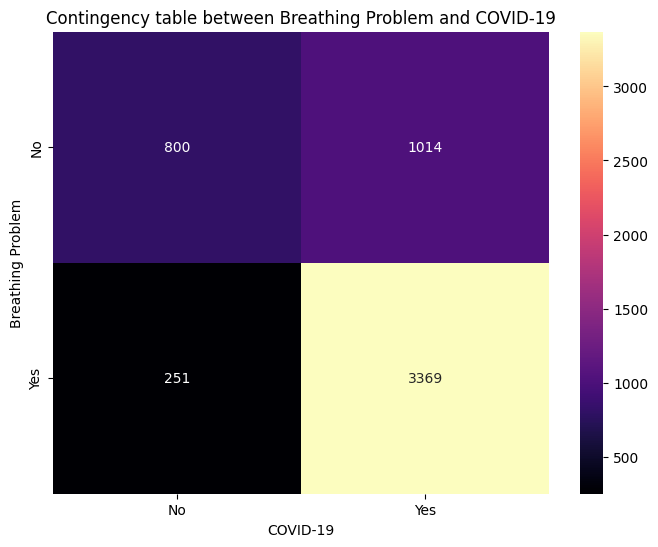

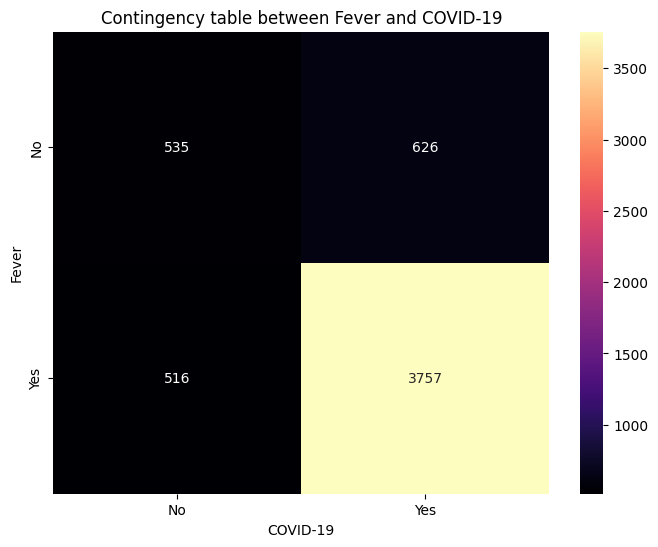

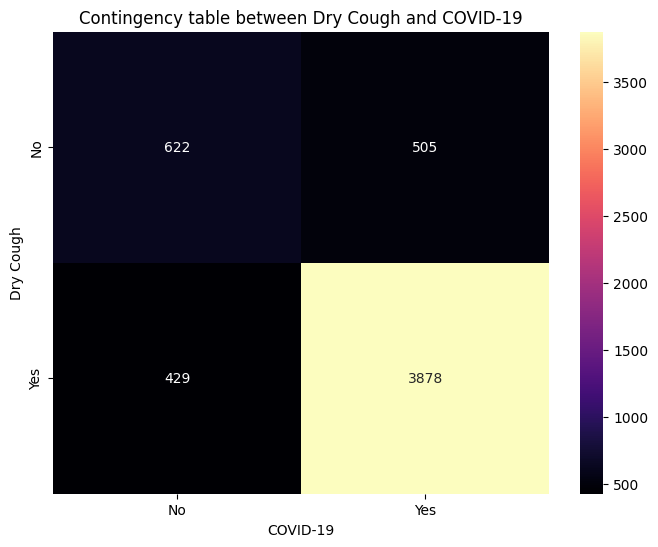

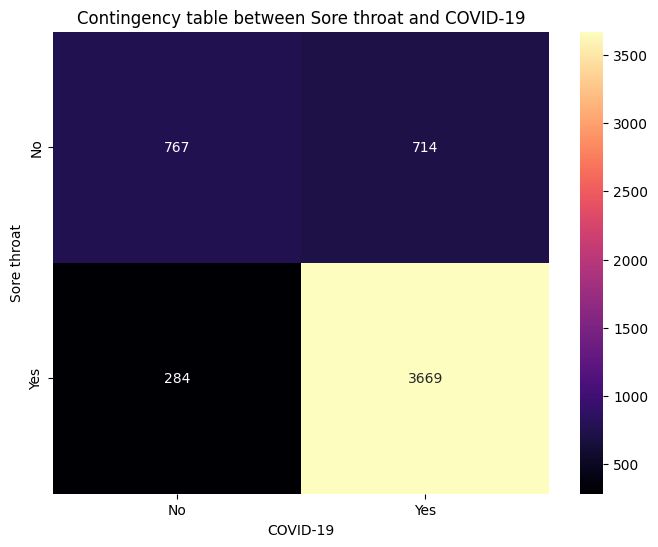

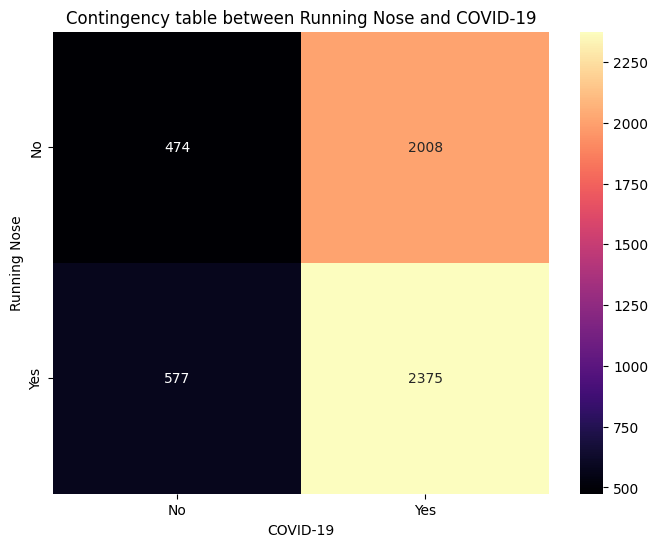

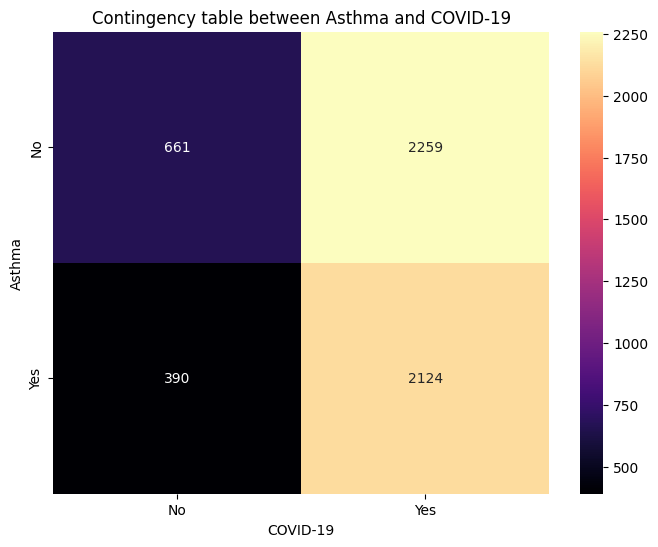

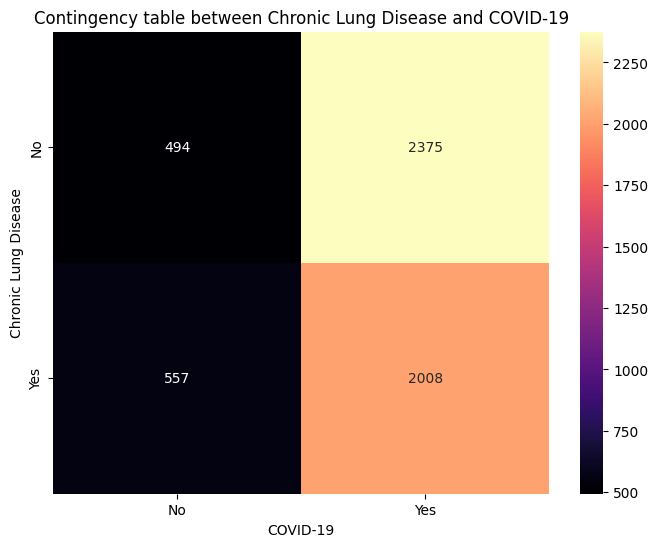

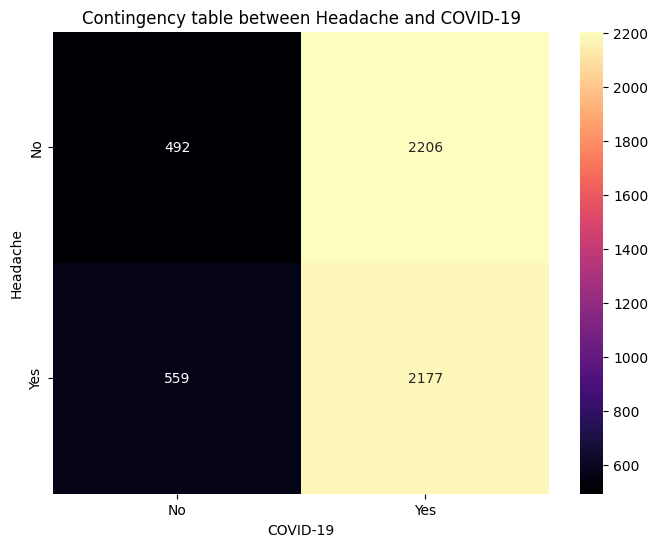

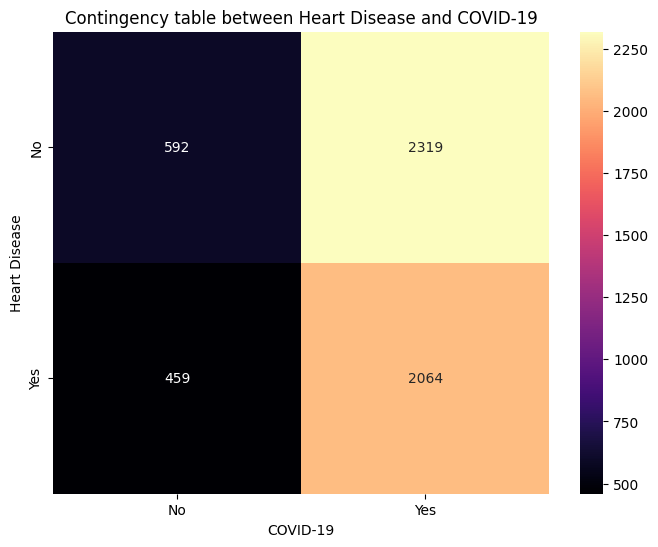

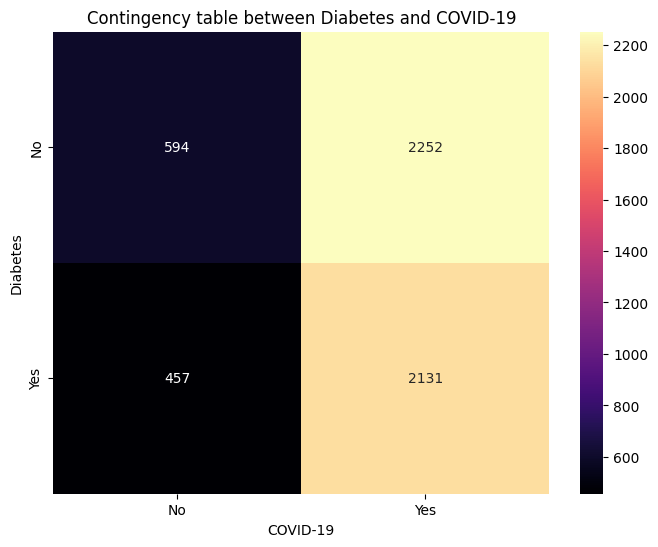

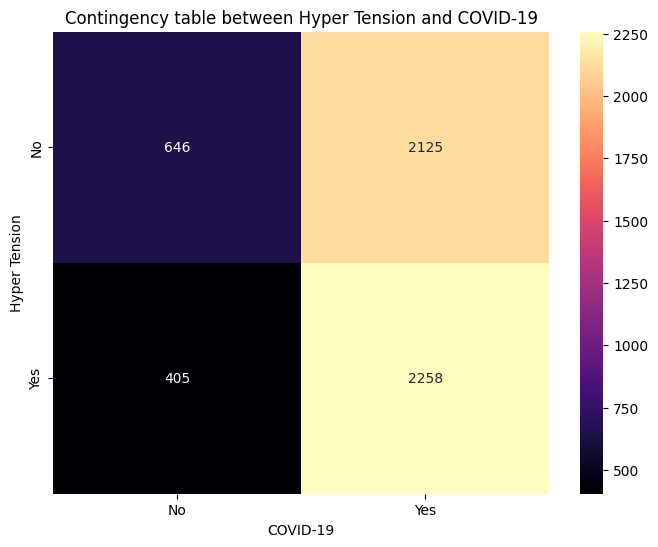

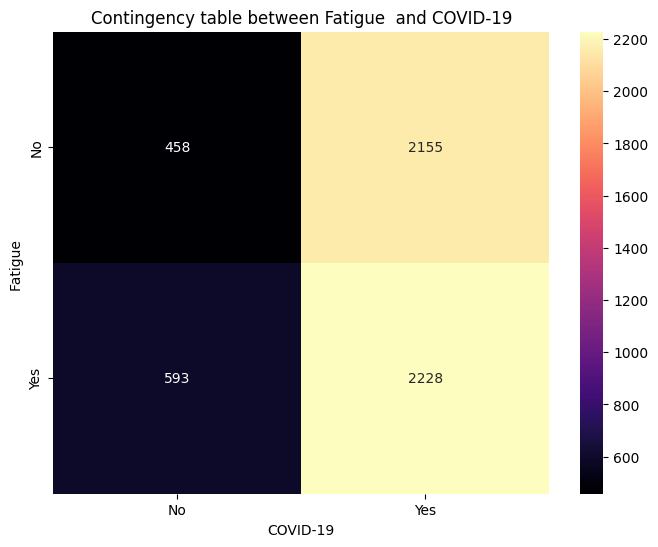

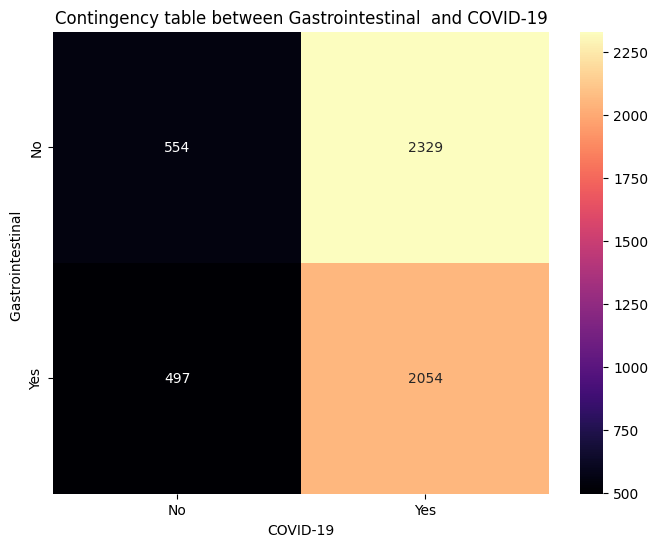

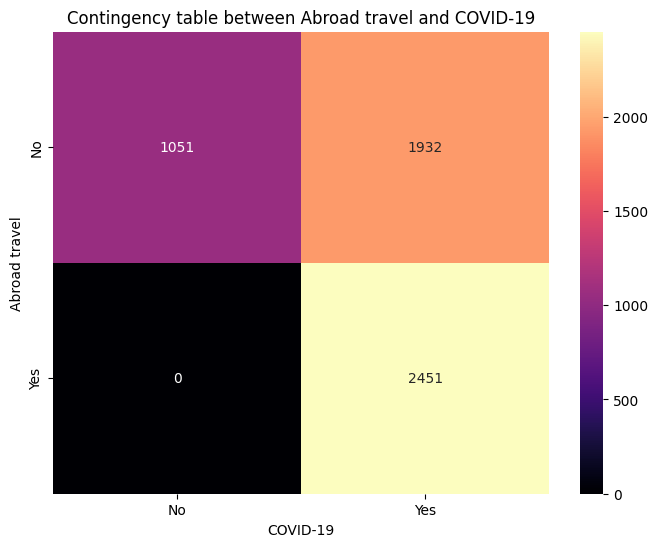

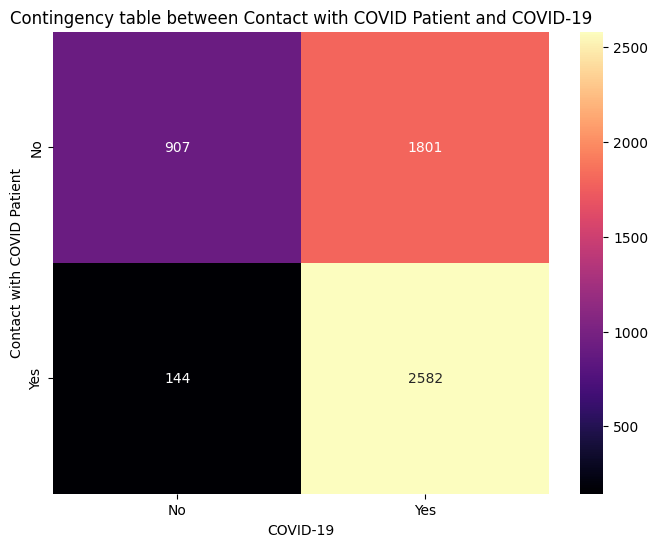

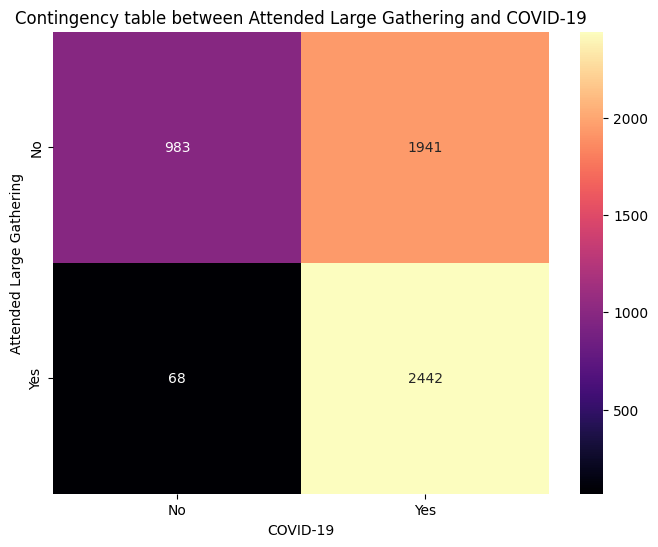

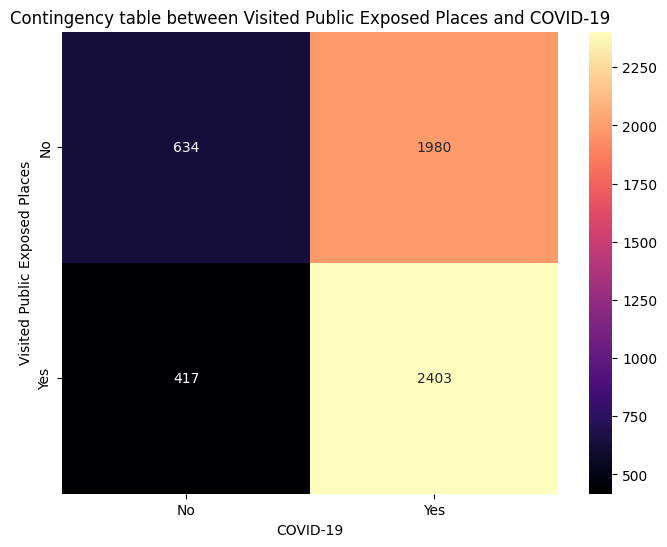

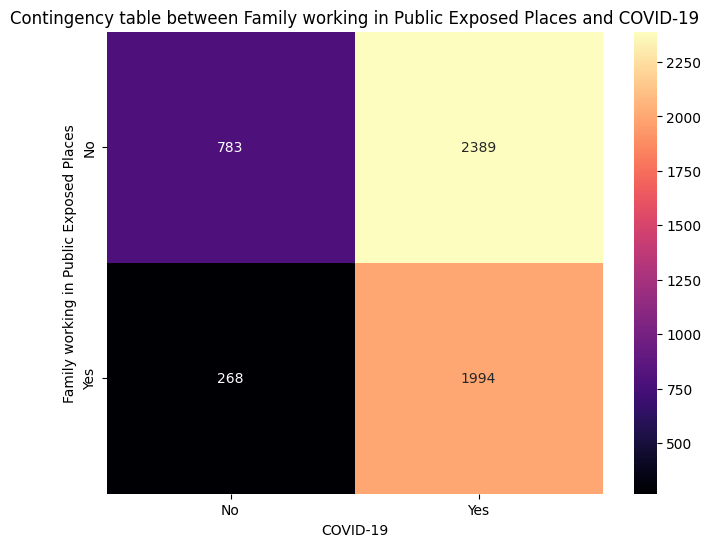

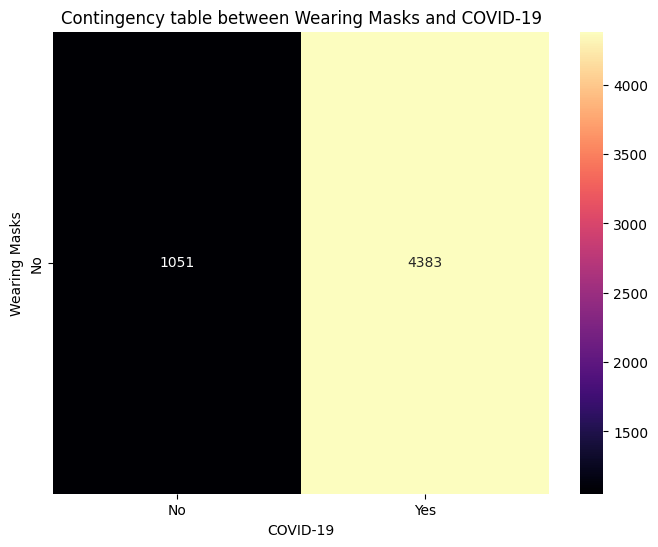

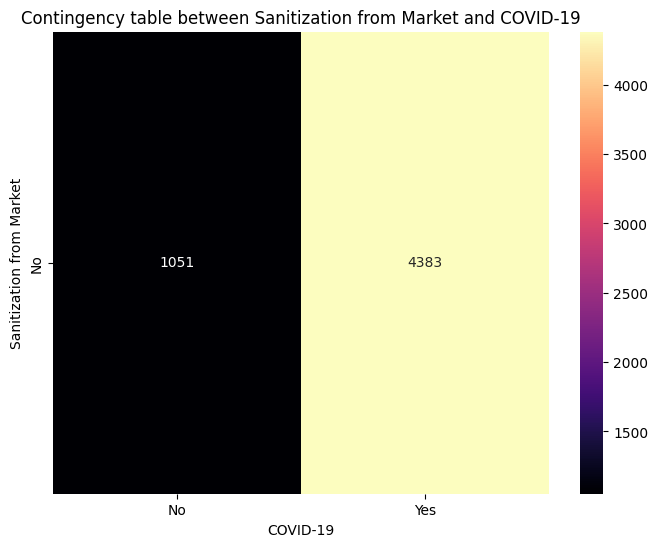

In [ ]:
import seaborn as sns
for var in features:
    table = pd.crosstab(df[var], df['COVID-19'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(table, annot=True, cmap='magma', fmt='d')
    plt.title(f'Contingency table between {var} and COVID-19')
    plt.show()

# Encoding variables

## Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder


df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtypes == 'object' else col)
df.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [ ]:
# Describtive  Statistic information
df.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [ ]:
# checking if there is a null value

print(f"Check if there is a null data :  {df.isnull().sum().any()}")
print("\n#################################################\n")
df.info()

Check if there is a null data :  False

#################################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   Breathing Problem                        5434 non-null   int64
 1   Fever                                    5434 non-null   int64
 2   Dry Cough                                5434 non-null   int64
 3   Sore throat                              5434 non-null   int64
 4   Running Nose                             5434 non-null   int64
 5   Asthma                                   5434 non-null   int64
 6   Chronic Lung Disease                     5434 non-null   int64
 7   Headache                                 5434 non-null   int64
 8   Heart Disease                            5434 non-null   int64
 9   Diabetes                                 5434 non

<img src= "https://hips.hearstapps.com/hmg-prod/images/prevention-line-break-1648844191.jpg?crop=1.00xw:0.486xh;0,0.248xh&resize=980:*">

## Feature Selection

### Correlation

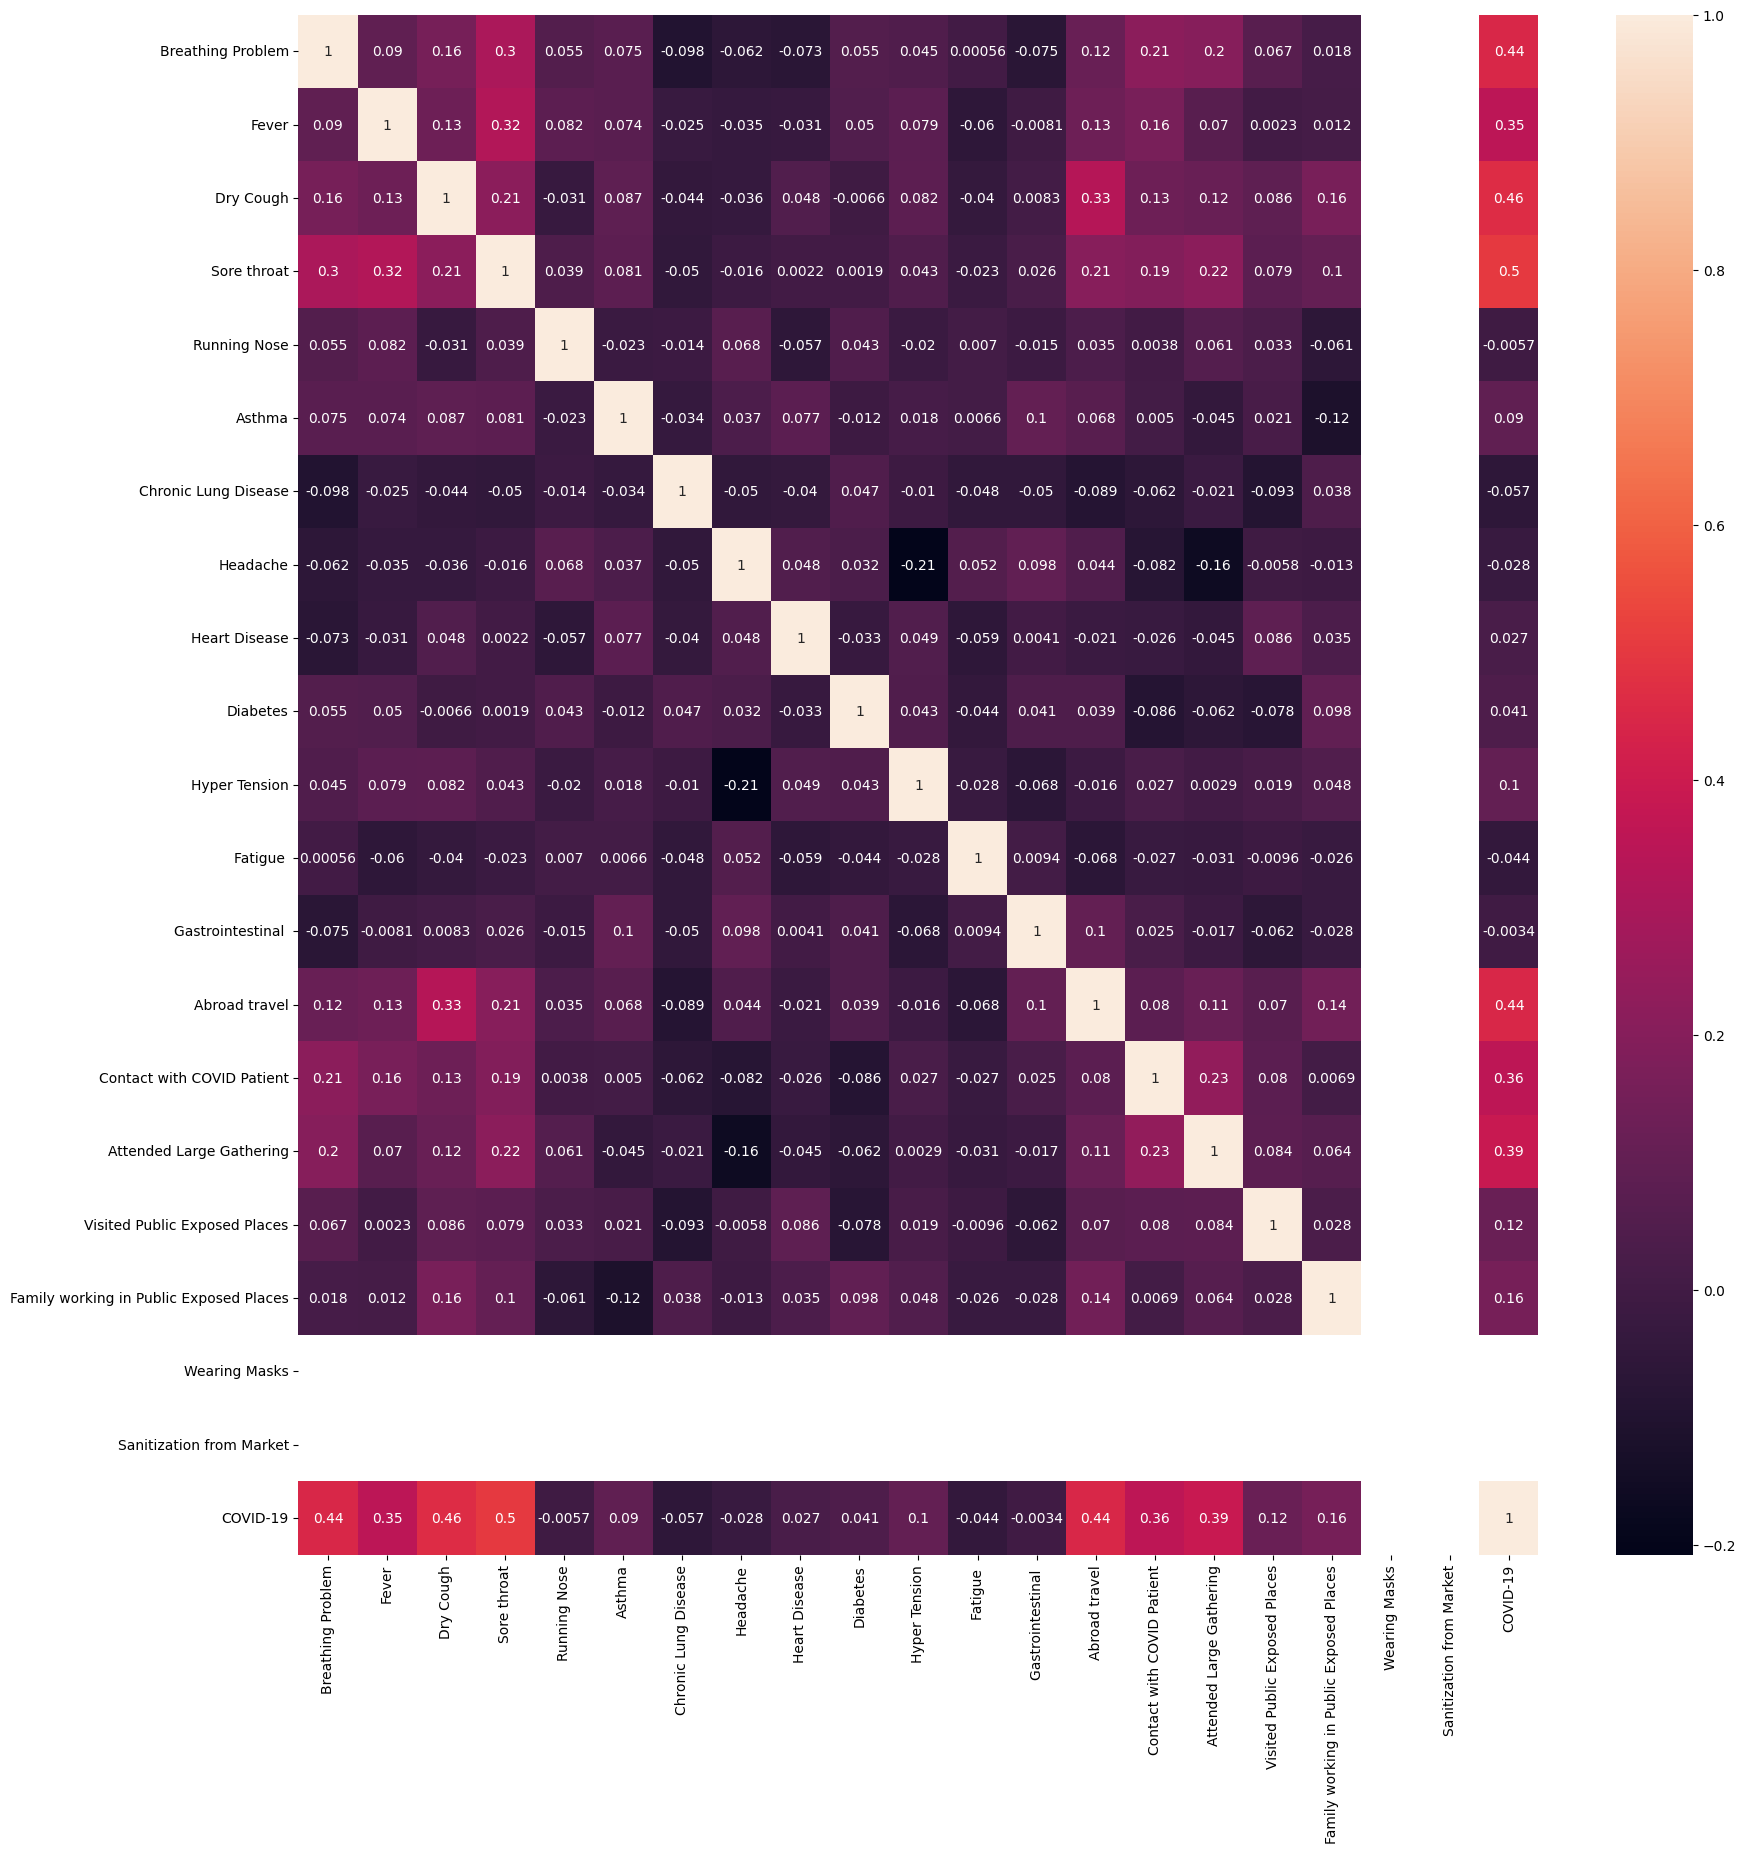

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

## Correlation Analysis of Symptoms and COVID-19 Presence

The heatmap above visualizes the Pearson correlation coefficients between various symptoms, exposure factors, and the COVID-19 infection status.

### Key Observations:

- **Strong Positive Correlations with COVID-19:**
  - **Sore Throat (0.50):** The strongest positive correlation, indicating it is a significant symptom associated with COVID-19 cases.
  - **Dry Cough (0.46), Breathing Problem (0.44), Abroad Travel (0.44), Contact with COVID Patient (0.36), Attended Large Gathering (0.39), and Fever (0.35):** These features show moderate to strong positive correlations, suggesting they are important predictors for infection.
  
- **Weak or Negligible Correlations:**
  - Features such as **Running Nose (-0.006)** and **Chronic Lung Disease (-0.057)** have very weak or slightly negative correlations, implying limited predictive power for COVID-19 in this dataset.

- **Inter-feature Relationships:**
  - Moderate positive correlations exist between some symptoms, for example, Fever and Sore Throat (0.32), Dry Cough and Sore Throat (0.21), reflecting common co-occurrence patterns in patients.


# Checking the unblanunbalanced data

In [ ]:
from collections import Counter
Counter (df['COVID-19'])

Counter({1: 4383, 0: 1051})

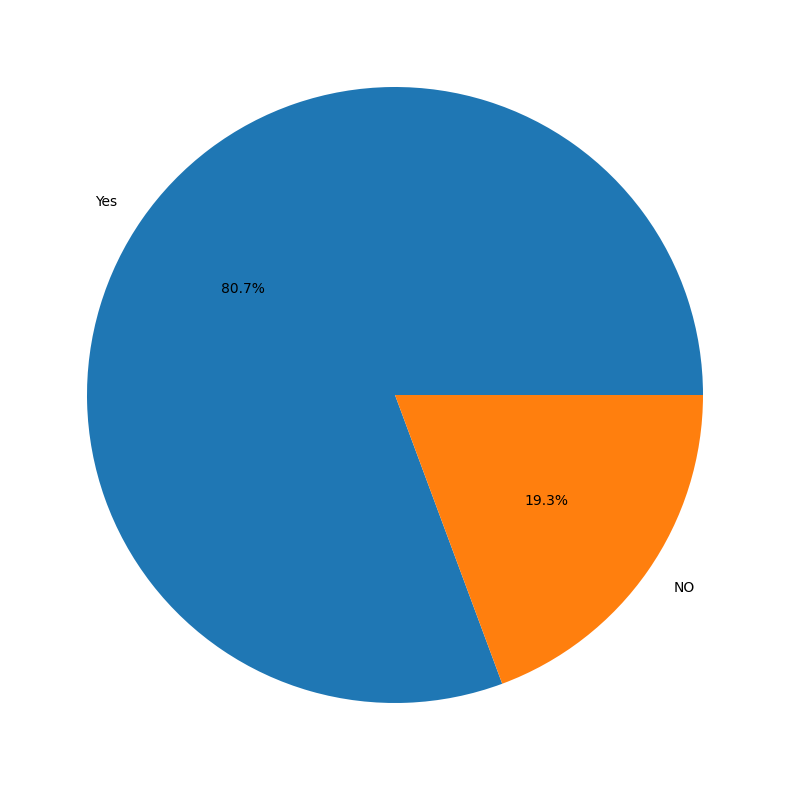

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
plt.pie(df['COVID-19'].value_counts(), labels=['Yes', 'NO'], autopct='%1.1f%%')
plt.show()

The pie chart shows that the data is imbalanced. To handle this, we will use oversampling with SMOTE to balance out the data.

# Spliting the Data

In [ ]:
Y = df['COVID-19']
X = df.drop(['COVID-19'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=1)

In [ ]:
print (f"X_train shape : {X_train.shape}")
print (f"X_test shape : {X_test.shape}")
print (f"Y_train shape : {Y_train.shape}")
print (f"Y_test shape : {Y_test.shape}")

X_train shape : (4075, 20)
X_test shape : (1359, 20)
Y_train shape : (4075,)
Y_test shape : (1359,)


In [ ]:
y_train_counts = pd.Series(Y_train).value_counts()
y_train_counts

,count
COVID-19,
1,3287
0,788


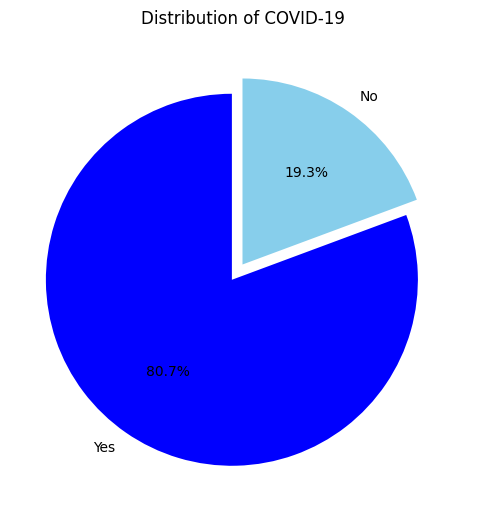

In [ ]:
value_counts = Y_train.value_counts()

labels = {1: 'Yes', 0: 'No'}
labels_to_use = [labels[value] for value in value_counts.index]

plt.figure(figsize=(6,8))
plt.pie(value_counts,
        labels=labels_to_use,
        explode=(.1, 0),
        colors=['blue', 'skyblue'],
        autopct="%1.1f%%",
        startangle=90)
plt.title('Distribution of COVID-19')
plt.show()

# Handeling the Unblanaced data
## Oversampling  With Smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Combine back into a new DataFrame
df_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
df_train_resampled['COVID-19'] = y_train_resampled
df_train_resampled.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,0,1,0,0,1,0,1,...,1,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,1
2,1,0,1,1,1,0,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
4,0,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,0


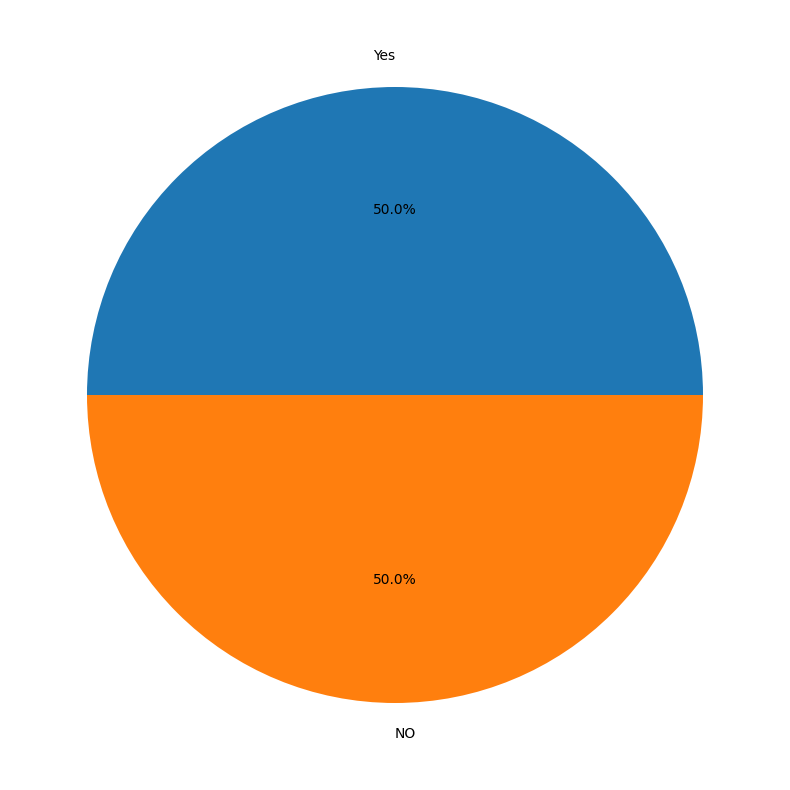

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 10))
plt.pie(df_train_resampled['COVID-19'].value_counts(), labels=['Yes', 'NO'], autopct='%1.1f%%')
plt.show()

After applying SMOTE to oversample the data, the classes in the training data are now balanced. Consequently, we have two sets of training data: one before applying SMOTE and one after applying SMOTE. The training model will be trained on both sets of data, and the results will be compared.

<img src="https://mir-s3-cdn-cf.behance.net/project_modules/1400/04ac5f55881223.5996e8ce6444e.png">

In [ ]:
df.drop(['Wearing Masks', 'Sanitization from Market'], axis=1, inplace=True)

# Training the model

## 1 - without Reassmpling the data

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### SVM Model

In [ ]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)
y_pred_svm = svm_model.predict(X_test)


print (f"\n Accuracy on training set : {svm_model.score(X_train, Y_train)}\n")
print (f" Accuracy on test set : {svm_model.score(X_test, Y_test)}")


 Accuracy on training set : 0.9852760736196319

 Accuracy on test set : 0.9749816041206769


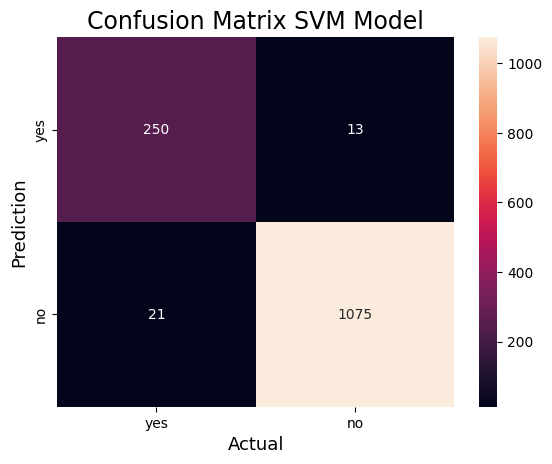

In [ ]:
cm_svm_re=confusion_matrix(Y_test, y_pred_svm)
sns.heatmap(cm_svm_re,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix SVM Model',fontsize=17)
plt.show()

<img src= "https://64.media.tumblr.com/ee6fe4e2805585254836a1ece0672aa4/d5548dfffa0dd344-85/s1280x1920/d6be304b4fee225e01f77f90159e34c29135a1da.png">

### KNN Model


#### Finding the Best K

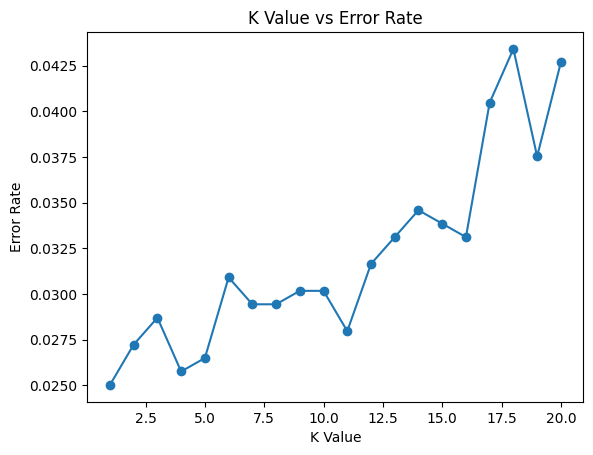

In [ ]:
error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    pred_k = model.predict(X_test)
    error_rates.append(1 - accuracy_score(Y_test, pred_k))

# Plot error rates
import matplotlib.pyplot as plt

plt.plot(range(1, 21), error_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

In [ ]:
# KNN Model

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, Y_train)
y_pred_knn = knn_model.predict(X_test)

print(f"\nAccuracy on training set: {knn_model.score(X_train, Y_train)}\n")
print(f"Accuracy on test set: {knn_model.score(X_test, Y_test)}")


Accuracy on training set: 0.9842944785276073

Accuracy on test set: 0.9742457689477557


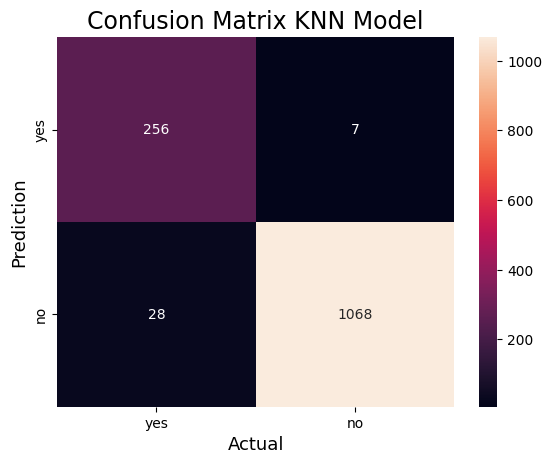

In [ ]:
cm_knn=confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(cm_knn,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix KNN Model',fontsize=17)
plt.show()

<img src= "https://hips.hearstapps.com/hmg-prod/images/prevention-line-break-1648844191.jpg?crop=1.00xw:0.486xh;0,0.248xh&resize=980:*">

## 2- Model with data train after applying SMOTE







In [ ]:
Y_resampled= df_train_resampled['COVID-19']
X_resampled = df_train_resampled.drop(['COVID-19'], axis = 1)

### SVM Model

In [ ]:
# SVM Model resample data
svm_model_re = SVC()
svm_model_re.fit(X_resampled, Y_resampled)

y_pred_svm_re = svm_model_re.predict(X_test)


print(f"\nAccuracy on training set: {svm_model_re.score(X_resampled, Y_resampled)}\n")
print(f"\nAccuracy on test set : {svm_model_re.score(X_test, Y_test)}")


Accuracy on training set: 0.9890477639184667


Accuracy on test set : 0.9764532744665195


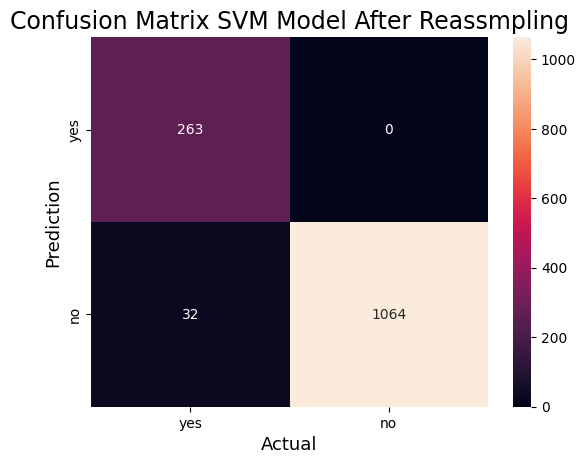

In [ ]:
cm_svm_re=confusion_matrix(Y_test, y_pred_svm_re)
sns.heatmap(cm_svm_re,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix SVM Model After Reassmpling',fontsize=17)
plt.show()

<img src= "https://64.media.tumblr.com/ee6fe4e2805585254836a1ece0672aa4/d5548dfffa0dd344-85/s1280x1920/d6be304b4fee225e01f77f90159e34c29135a1da.png">

### KNN Model


#### Finding the Best K

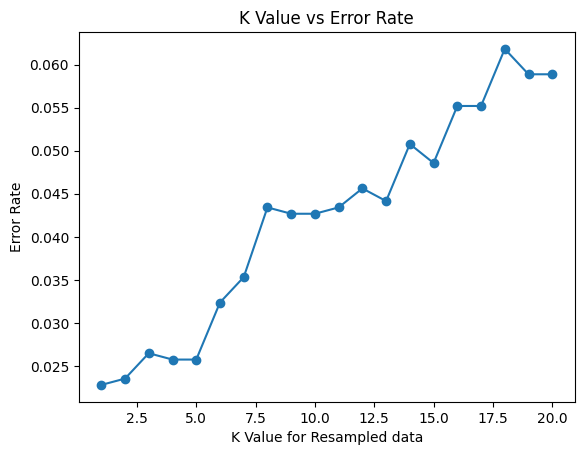

In [ ]:
error_rates = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_resampled, Y_resampled)
    pred_k = model.predict(X_test)
    error_rates.append(1 - accuracy_score(Y_test, pred_k))

# Plot error rates
import matplotlib.pyplot as plt

plt.plot(range(1, 21), error_rates, marker='o')
plt.xlabel('K Value for Resampled data')
plt.ylabel('Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

In [ ]:
# KNN Model

knn_model_re = KNeighborsClassifier(n_neighbors=4)
knn_model_re.fit(X_resampled, Y_resampled)
y_pred_knn_re = knn_model.predict(X_test)

print(f"\nAccuracy on training set: {knn_model_re.score(X_resampled, Y_resampled)}\n")
print(f"Accuracy on test set: {knn_model_re.score(X_test, Y_test)}")


Accuracy on training set: 0.9887435351384241

Accuracy on test set: 0.9742457689477557


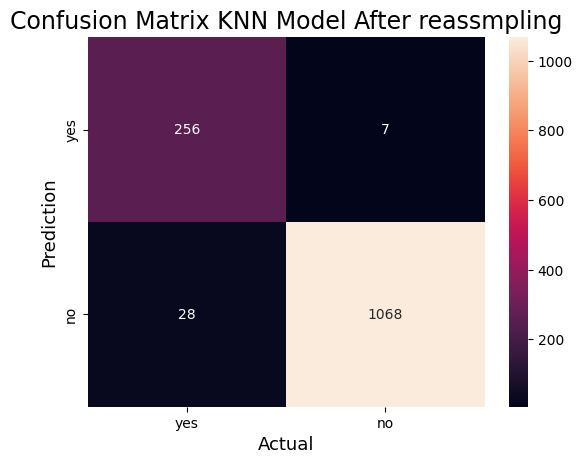

In [ ]:
cm_knn_re=confusion_matrix(Y_test, y_pred_knn_re)
sns.heatmap(cm_knn_re,
            annot=True,
            fmt='g',
            xticklabels=['yes','no'],
            yticklabels=['yes','no'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix KNN Model After reassmpling',fontsize=17)
plt.show()

# Hyperparameter Tuning for all models

In [ ]:
from sklearn.model_selection import GridSearchCV
best_models = {
    "KNN": knn_model_re,
    "SVM": svm_model_re,
}


In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_resampled, Y_resampled)

print("Best KNN Params:", grid_knn.best_params_)
print("Best KNN F1 Score:", grid_knn.best_score_)


Best KNN Params: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best KNN F1 Score: 0.9889235001955677


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_resampled, Y_resampled)

print(" Best SVM Params:", grid_svm.best_params_)
print(" Best SVM F1 Score:", grid_svm.best_score_)


 Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
 Best SVM F1 Score: 0.9889235001955677


In [ ]:
best_knn = grid_knn.best_estimator_
best_svm = grid_svm.best_estimator_


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Function to extract precision, recall, and F1-score from the classification report
def extract_metrics(report):
    metrics = report['1']  # '1' refers to the positive class; modify if needed for other classes
    return metrics['precision'], metrics['recall'], metrics['f1-score']

# Function to evaluate and store model performance
def evaluate_model(model, model_name, X_train, Y_train, X_test, Y_test, y_pred):
    train_accuracy = model.score(X_train, Y_train)
    test_accuracy = model.score(X_test, Y_test)
    report = classification_report(Y_test, y_pred, output_dict=True)
    precision, recall, f1_score = extract_metrics(report)
    return model_name, train_accuracy, test_accuracy, precision, recall, f1_score

# Store results in a list
results = []

# --- Before Resampling ---


# Evaluate models before resampling
results.append(evaluate_model(svm_model, "SVM", X_train, Y_train, X_test, Y_test, y_pred_svm))
results.append(evaluate_model(knn_model, "KNN", X_train, Y_train, X_test, Y_test, y_pred_knn))


print("\n" + "="*50 + "\n")

# --- After Resampling ---
print("--- Model Evaluation BEFORE AND AFTER Resampling (using resampled training data) (SMOTE) And aslo Heyperparameter tuning for the resampled models  ---")

# Evaluate models after resampling
results.append(evaluate_model(svm_model_re, "SVM (Resampled)", X_train, Y_train, X_test, Y_test, y_pred_svm_re))
results.append(evaluate_model(knn_model_re, "KNN (Resampled)", X_train, Y_train, X_test, Y_test, y_pred_knn_re))


# Evaluate resampled models after parameter tuning

results.append(evaluate_model(best_svm, "SVM (Tuned)", X_train, Y_train, X_test, Y_test, y_pred_svm_re))
results.append(evaluate_model(best_knn, "KNN (Tuned)", X_train, Y_train, X_test, Y_test, y_pred_knn_re))




# Create DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Training Accuracy", "Test Accuracy", "Precision", "Recall", "F1-Score"])

# Print the results in a structured table
print(f"\n\n\n{results_df.to_string(index_names=False)}")




--- Model Evaluation BEFORE AND AFTER Resampling (using resampled training data) (SMOTE) And aslo Heyperparameter tuning for the resampled models  ---



             Model  Training Accuracy  Test Accuracy  Precision    Recall  F1-Score
0              SVM           0.985276       0.974982   0.988051  0.980839  0.984432
1              KNN           0.984294       0.974246   0.993488  0.974453  0.983878
2  SVM (Resampled)           0.982331       0.976453   1.000000  0.970803  0.985185
3  KNN (Resampled)           0.981840       0.974246   0.993488  0.974453  0.983878
4      SVM (Tuned)           0.982331       0.976453   1.000000  0.970803  0.985185
5      KNN (Tuned)           0.984540       0.973510   0.993488  0.974453  0.983878


# Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

def evaluate_model_cv(model, X, Y, model_name):
    acc_scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    f1_scores = cross_val_score(model, X, Y, cv=10, scoring='f1')

    print(f"\n {model_name}")
    print(f" Accuracy : {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f" F1 Score : {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")



### Original Models

In [ ]:
evaluate_model_cv(knn_model, X, Y, "KNN (Original)")
evaluate_model_cv(svm_model, X, Y, "SVM (Original)")




 KNN (Original)
 Accuracy : 0.9369 ± 0.0645
 F1 Score : 0.9598 ± 0.0421

 SVM (Original)
 Accuracy : 0.9663 ± 0.0337
 F1 Score : 0.9791 ± 0.0210


### Models after Reassmpling

In [ ]:
evaluate_model_cv(knn_model_re, X_resampled, Y_resampled, "KNN (Resampled)")
evaluate_model_cv(svm_model_re, X_resampled, Y_resampled, "SVM (Resampled)")




 KNN (Resampled)
 Accuracy : 0.9849 ± 0.0044
 F1 Score : 0.9847 ± 0.0045

 SVM (Resampled)
 Accuracy : 0.9890 ± 0.0044
 F1 Score : 0.9889 ± 0.0045


### Tuned Models

In [ ]:
evaluate_model_cv(best_knn, X_resampled, Y_resampled, "KNN (Tuned)")
evaluate_model_cv(best_svm, X_resampled, Y_resampled, "SVM (Tuned)")




 KNN (Tuned)
 Accuracy : 0.9886 ± 0.0041
 F1 Score : 0.9885 ± 0.0042

 SVM (Tuned)
 Accuracy : 0.9890 ± 0.0044
 F1 Score : 0.9889 ± 0.0045


#### Final Reoport for the cross validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Scoring metrics setup
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0)
}

# Function to evaluate any model using cross-validation
def evaluate_model(name, model, X, Y, cv=10):
    scores = cross_validate(model, X, Y, cv=cv, scoring=scoring)
    return {
        'Model': name,
        'Accuracy (mean)': round(scores['test_accuracy'].mean(), 4),
        'Accuracy (std)': round(scores['test_accuracy'].std(), 4),
        'Precision (mean)': round(scores['test_precision'].mean(), 4),
        'Recall (mean)': round(scores['test_recall'].mean(), 4),
        'F1-Score (mean)': round(scores['test_f1'].mean(), 4),
        'F1-Score (std)': round(scores['test_f1'].std(), 4),
    }

# List to collect all results
results = []

# Original models
results.append(evaluate_model("KNN (Original)", knn_model, X, Y))
results.append(evaluate_model("SVM (Original)", svm_model, X, Y))

# Resampled models
results.append(evaluate_model("KNN (Resampled)", knn_model_re, X_resampled, Y_resampled))
results.append(evaluate_model("SVM (Resampled)", svm_model_re, X_resampled, Y_resampled))


# Tuned models
results.append(evaluate_model("KNN (Tuned)", best_knn, X_resampled, Y_resampled))
results.append(evaluate_model("SVM (Tuned)", best_svm, X_resampled, Y_resampled))

# Convert to DataFrame
report_df = pd.DataFrame(results)

# Print final report
print("\n=== Final Cross-Validation Report ===\n")
print(report_df.to_string(index=False))



=== Final Cross-Validation Report ===

          Model  Accuracy (mean)  Accuracy (std)  Precision (mean)  Recall (mean)  F1-Score (mean)  F1-Score (std)
 KNN (Original)           0.9369          0.0645            0.9697         0.9509           0.9598          0.0421
 SVM (Original)           0.9663          0.0337            0.9795         0.9792           0.9791          0.0210
KNN (Resampled)           0.9849          0.0044            1.0000         0.9699           0.9847          0.0045
SVM (Resampled)           0.9890          0.0044            1.0000         0.9781           0.9889          0.0045
    KNN (Tuned)           0.9886          0.0041            0.9988         0.9784           0.9885          0.0042
    SVM (Tuned)           0.9890          0.0044            1.0000         0.9781           0.9889          0.0045


#**Comparative Model Performance: Original, Resampled, and Tuned Models**

The figure above presents a comprehensive comparison of the model performances across three stages:

1. **Original Models:**  
   Models trained on the raw imbalanced dataset without any resampling or hyperparameter tuning.

2. **Resampled Models:**  
   Models trained on the dataset after applying Synthetic Minority Oversampling Technique (SMOTE) to balance classes. This addresses class imbalance and improves learning of minority cases.

3. **Tuned Models:**  
   Models further optimized with hyperparameter tuning using GridSearchCV combined with 10-fold cross-validation to find the best parameter settings.

### Key Observations:

- **Improvement after Resampling:**  
  All models show noticeable gains in accuracy, precision, recall, and F1-score after resampling. This confirms the importance of balancing the training data in imbalanced classification problems.

- **Effect of Hyperparameter Tuning:**  
  Tuning further stabilizes the models, reduces variance, and slightly improves or maintains high performance metrics, especially for SVM and KNN.

- **Consistent Top Performers:**  
  SVM and KNN consistently outperform other models at each stage, with resampled and tuned versions achieving the best overall results.

- **Balanced Performance:**  
  High precision and recall values indicate models can accurately identify COVID-19 cases with minimal false positives and false negatives.


---

#**Final Conclusion**

This study developed machine learning models to predict COVID-19 infection based on clinical symptoms collected from a May 2020 dataset.

Key takeaways:

- The dataset was imbalanced, with significantly more positive cases, so Synthetic Minority Oversampling Technique (SMOTE) was applied to balance the training data.
- Support Vector Machine (SVM) and K-Nearest Neighbors (KNN) were trained on original, resampled, and hyperparameter-tuned datasets.
- Resampling and tuning consistently improved model performance, reducing false positives and improving detection of positive cases.
- **SVM (Resampled)** achieved the best overall results with perfect precision and strong recall, making it the most reliable model in this context.
- **KNN (Resampled)** is a strong alternative, especially if recall is prioritized.


This project demonstrates the effective use of data preprocessing, machine learning, and interpretability to assist healthcare professionals in early COVID-19 diagnosis.
